In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import chdir as cd
cd("/content/drive/MyDrive/UNIST/빗썸_암호화폐_코드정리")

# 0. Extracting price, market cap and volume data
Price, market cap and volume data of top 200 coins are extracted from CoinGeckoAPI, a coinranking site. There are __total 146 coins__ in data because we exclude coins without 365 datapoints.

OUTPUT PATH: data

In [3]:
# pycoin
pip install -U pycoingecko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pycoingecko import CoinGeckoAPI
from tqdm import tqdm
from utils.get_data import get_coin_df, get_coin_df_volume
import pandas as pd

In [ ]:
# Top 100 coins - 24시간 trading volume 기준 (2022-10-18 pm 12:40, 한국시간)
coin_ids_100 = [
    "tether", "bitcoin", "ethereum", "binance-usd", "usd-coin",
    "ripple", "solana", "bitcoin-cash", "binancecoin", "matic-network",
    "quant-network", "cardano", "dai", "tron", "chainlink",
    "ethereum-classic", "cosmos", "litecoin", "terra-luna", "polkadot",
    "wrapped-bitcoin", "dogecoin", "avalanche-2", "chiliz", "aave",
    
    "shiba-inu", "the-sandbox", "terra-luna-2", "near", "filecoin",
    "apecoin", "huobi-token", "uniswap", "eos", "maker",
    "fantom", "ethereum-name-service", "decentraland", "curve-dao-token", "ftx-token",
    "monero", "havven", "algorand", "stellar", "casper-network",
    "zcash", "paxos-standard", "usdd", "vechain", "tokenize-xchange",
    
    "hedera-hashgraph", "axie-infinity", "lido-dao", "thorchain", "crypto-com-chain",
    "basic-attention-token", "elrond-erd-2", "pancakeswap-token", "flow", "internet-computer",
    "true-usd", "ethereum-pow-iou", "dash", "zilliqa", "neo",
    "the-graph", "okb", "klay-token", "tezos", "bitcoin-cash-sv",
    "enjincoin", "bittorrent", "theta-token", "staked-ether", "arweave",
    
    "chain-2", "blockstack", "celsius-degree-token", "trust-wallet-token", "frax-share",
    "osmosis", "iota", "bitdao", "kava", "frax",
    "pax-gold", "ecash", "xdce-crowd-sale", "nexo", "helium",
    "evmos", "gatechain-token", "rocket-pool", "leo-token", "kucoin-shares",
    "tether-gold", "radix", "cdai", "compound-usd-coin", "compound-ether",
]

# Top 101~200 coins
coin_ids_200 = [
    "polymath", "mdex", "ankr", "gala", "just",
    "golem", "reserve-rights-token", "sushi", "terrausd", "waves",
    "stepn", "optimism", "injective-protocol", "dydx", "qtum",
    "apenft", "1inch", "loopring", "omisego", "oasis-network",
    "compound-governance-token", "yearn-finance", "mina-protocol", "serum", "woo-network",
    
    "ravencoin", "holotoken", "uma", "playdapp", "ontology",
    "immutable-x", "mxc", "balancer", "celo", "harmony",
    "merit-circle", "moonbeam", "swipe", "gmx", "theta-fuel",
    "0x", "bone-shibaswap", "skale", "hive", "iostoken",
    "nem", "decred", "wax", "synapse-2", "audius",
    
    "energy-web-token", "siacoin", "convex-finance", "amp-token", "zencash",
    "bitcoin-gold", "husd", "zelcash", "kadena", "livepeer",
    "iotex", "dao-maker", "baby-doge-coin", "icon", "liquity-usd",
    "msol", "vvs-finance", "nucypher", "chia", "dogelon-mars",
    "defichain", "magic-internet-money", "secret", "gnosis", "songbird",
    
    "constellation-labs", "oec-token", "ribbon-finance", "gemini-dollar", "bitclout",
    "escoin-token", "olympus", "bitrise-token", "tether-eurt", "convex-crv",
    "juno-network", "rocket-pool-eth", "ecomi", "link", "tenset",
    "coinex-token", "huobi-btc", "maiar-dex", "swissborg", "alchemix-usd",
    "nxm", "coinmetro", "compound-usdt", "safemoon", "pha"
]

coin_ids = coin_ids_100 + coin_ids_200

In [ ]:
# use coingecko API
cg = CoinGeckoAPI()

In [ ]:
base_data = cg.get_coin_market_chart_range_by_id(id="bitcoin", vs_currency="usd", from_timestamp=1640962800, to_timestamp=1656601200) # 2022-01-01 ~ 2022-07-01

In [ ]:
df_prices = pd.DataFrame()
df_prices["uts"] = [base_data["prices"][i][0] for i in range(len(base_data["prices"]))]
df_prices

,uts
0,1640995200000
1,1641081600000
2,1641168000000
3,1641254400000
4,1641340800000
...,...
176,1656201600000
177,1656288000000
178,1656374400000
179,1656460800000


In [ ]:
# refer coin ids of analysed data
df_refer = pd.read_csv("coingecko_usd_prices_146.csv")
df_refer = df_refer.drop("uts", axis=1)
coin_ids_146 = df_refer.columns.to_list()

In [ ]:
coin_ids = coin_ids
bs_coin = [] # below standard (excluding no 365 datapoints)

df_prices = pd.DataFrame(columns=["uts"])
df_prices["uts"] = [base_data["prices"][i][0] for i in range(len(base_data["prices"]))]

df_market_caps = pd.DataFrame(columns=["uts"])
df_market_caps["uts"] = [base_data["prices"][i][0] for i in range(len(base_data["prices"]))]

df_volume = pd.DataFrame(columns=["uts"])
df_volume["uts"] = [base_data["prices"][i][0] for i in range(len(base_data["prices"]))]

for c in tqdm(coin_ids):
    c_data = cg.get_coin_market_chart_range_by_id(id=c, vs_currency="usd", from_timestamp=1640962800, to_timestamp=1656601200) # 2022-01-01 ~ 2022-07-01
    
    # exclude coins without 365 datapoints
    if len(c_data["prices"]) != len(base_data["prices"]):
        bs_coin.append(c)

    # extract coins' price, market cap and volume data
    else:
        df_p, df_m = get_coin_df(c_data, c) # price, market cap
        df_v = get_coin_df_volume(c_data, c) # volume

        df_prices = pd.merge(df_prices, df_p, on="uts")
        df_market_caps = pd.merge(df_market_caps, df_m, on="uts")
        df_volume = pd.merge(df_volume, df_v, on="uts")

# save csv
df_prices.to_csv("data/coingecko_usd_price.csv", index=False)
df_market_caps.to_csv("data/coingecko_usd_market_cap.csv", index=False)
df_volume.to_csv("data/coingecko_volume.csv", index=False)

100%|██████████| 146/146 [12:20<00:00,  5.07s/it]


In [ ]:
df_prices

,uts,polymath,ankr,gala,just,golem,reserve-rights-token,sushi,terrausd,waves,...,gemini-dollar,ecomi,link,coinex-token,huobi-btc,swissborg,nxm,coinmetro,compound-usdt,pha
0,1609459200000,0.081416,0.008509,0.001495,0.022190,0.108248,0.019989,2.862797,0.996017,6.186444,...,0.999546,0.000034,15.001501,0.008717,28939.313083,0.263161,28.272548,0.048887,0.020506,0.101987
1,1609545600000,0.099452,0.008961,0.001026,0.022801,0.110727,0.025337,3.324195,1.003929,6.036660,...,0.997411,0.000038,15.171362,0.009150,29275.526803,0.263373,27.969411,0.053861,0.020519,0.121082
2,1609632000000,0.092002,0.008637,0.001114,0.023633,0.106259,0.029018,3.204396,1.005249,5.592164,...,1.001434,0.000037,14.054497,0.009308,31843.327481,0.242805,29.681810,0.063797,0.021138,0.116870
3,1609718400000,0.100651,0.008741,0.001093,0.024368,0.105205,0.032473,3.495572,0.980931,5.542689,...,0.988278,0.000036,14.400250,0.009609,33021.403338,0.259160,38.281173,0.063143,0.020747,0.117574
4,1609804800000,0.092697,0.008393,0.001379,0.023608,0.108190,0.029812,3.478262,0.993172,5.298508,...,0.984811,0.000041,13.586073,0.009839,31225.716250,0.273219,38.547098,0.063743,0.020077,0.115654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1640563200000,0.551901,0.114065,0.512599,0.058770,0.505310,0.033108,7.939166,1.002638,16.268589,...,1.002078,0.006384,191.179493,0.079421,49992.110422,0.621249,135.562810,0.577524,0.021664,0.495985
361,1640649600000,0.555838,0.115641,0.540676,0.059366,0.493774,0.033245,9.132540,1.001185,16.501465,...,0.998543,0.006769,184.552531,0.078916,50777.193572,0.631390,134.615044,0.589589,0.021649,0.471588
362,1640736000000,0.502906,0.104160,0.468943,0.055685,0.455877,0.030252,9.099629,1.001981,14.972142,...,1.000759,0.006460,170.283968,0.074053,47742.432715,0.622621,126.738492,0.540167,0.021666,0.425779
363,1640822400000,0.480902,0.099958,0.449069,0.054364,0.429386,0.029591,9.097429,1.004759,14.365681,...,0.999553,0.006220,172.012044,0.071385,46788.486957,0.607146,121.160470,0.549665,0.021677,0.405194


In [ ]:
df_market_caps

,uts,polymath,ankr,gala,just,golem,reserve-rights-token,sushi,terrausd,waves,...,gemini-dollar,ecomi,link,coinex-token,huobi-btc,swissborg,nxm,coinmetro,compound-usdt,pha
0,1609459200000,6.044977e+07,5.434504e+07,1.127853e+07,3.181597e+07,1.104925e+08,1.852604e+08,3.635904e+08,1.809967e+08,6.163717e+08,...,1.580715e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.571249e+08,2.504012e+08,1.896177e+08,1.479469e+07,9.058355e+07,1.376719e+07
1,1609545600000,7.579739e+07,5.837002e+07,7.740600e+06,3.261761e+07,1.104925e+08,2.390368e+08,4.219191e+08,1.826956e+08,6.036660e+08,...,1.842616e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.610045e+08,2.449438e+08,1.880376e+08,1.640128e+07,9.310922e+07,1.648044e+07
2,1609632000000,6.834205e+07,5.592719e+07,8.372406e+06,3.381862e+07,1.104925e+08,2.706309e+08,4.065832e+08,1.822642e+08,5.587377e+08,...,1.969347e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.827270e+08,2.294060e+08,1.995639e+08,1.885294e+07,9.373187e+07,1.604669e+07
3,1609718400000,7.416428e+07,5.705652e+07,8.115969e+06,3.509426e+07,1.104925e+08,3.146645e+08,4.479397e+08,1.829086e+08,5.687337e+08,...,2.033849e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.965247e+08,2.457846e+08,2.573255e+08,1.914852e+07,9.911019e+07,1.615722e+07
4,1609804800000,6.974319e+07,5.445400e+07,1.030121e+07,3.391508e+07,1.104925e+08,2.782865e+08,4.381814e+08,1.827767e+08,5.290589e+08,...,2.423841e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.780931e+08,2.546392e+08,2.594302e+08,1.931261e+07,1.195769e+08,1.585036e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1640563200000,4.975104e+08,9.303424e+08,3.865007e+09,4.280995e+08,5.053098e+08,4.352835e+08,1.527035e+09,9.958033e+09,1.626859e+09,...,2.588841e+08,1.533862e+09,1.136263e+09,3.076493e+08,1.994056e+09,5.912765e+08,9.344241e+08,1.748922e+08,1.023205e+09,9.031509e+07
361,1640649600000,5.006050e+08,9.468221e+08,4.100950e+09,4.345055e+08,4.937745e+08,4.390768e+08,1.763230e+09,1.003108e+10,1.656765e+09,...,1.836667e+08,1.627146e+09,1.101169e+09,3.062558e+08,2.027236e+09,6.009286e+08,9.286848e+08,1.789067e+08,9.808982e+08,8.566708e+07
362,1640736000000,4.550482e+08,8.556780e+08,3.556136e+09,4.073030e+08,4.558766e+08,4.002139e+08,1.772554e+09,1.006378e+10,1.497214e+09,...,1.712279e+08,1.551050e+09,1.044423e+09,2.870700e+08,1.904402e+09,5.934015e+08,8.757337e+08,1.645670e+08,9.846810e+08,7.756120e+07
363,1640822400000,4.311825e+08,8.143016e+08,3.346954e+09,3.964964e+08,4.294995e+08,3.859343e+08,1.746142e+09,1.004537e+10,1.430756e+09,...,1.706947e+08,1.491292e+09,1.027947e+09,2.756135e+08,1.872378e+09,5.772825e+08,8.333491e+08,1.643855e+08,8.548871e+08,7.307123e+07


In [ ]:
df_volume

<AxesSubplot:>

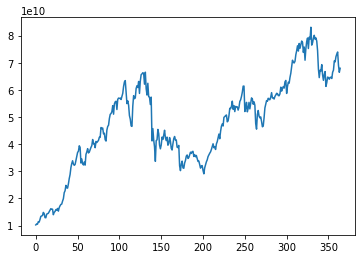

In [ ]:
df_market_caps.iloc[:,1:].sum(axis=1).plot()